### Bloom filter
Bloom filter is probablistic memory efficient data structure that holds the number of items and depicts the prediction of an item. Either item presents in the set or not. The accuracy of the forecasting is strongly depending on certain factor:
   - If expected numbers are known that needs to be inserted into the bloom filter.
   - What is your desired false positive rate
with the help of these parameter one can easily define the size of the bit array


#### Description
A bloom filter is the size of bit array with certain hash function: Note take a hash number and then take a *%* of that number with the range of the bit array size. The return result will be in the limit of the size of the bit array. For example a word **Cat** is hashed using three hash function: The result will be location 4, 28, 59 for the bit array size of 128 bit. This means the bit position **1, 3, 7** is set to be **1**. Whenever, you check **Cat** it return true. For accuracy the presence of an item is only exist when all bits are set to be true.


Key feature is that it always produce false positive, however, never reports the false negative; 

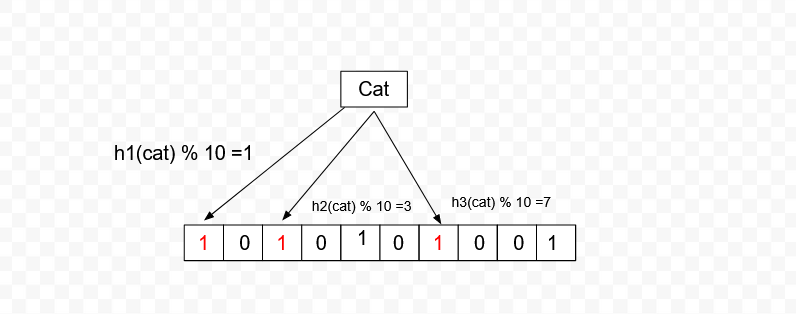

### Algorithm Description
 Two parameters such as **items_count** and **fp_prob** are provided by the users that are furthur used for the calculation of bit array size and hash functions. The size **m = -(n x math.log(p))/(math.log(2)^2)**  and hash functions that are calculated as **(m/n) * math.log(2)**. Moreover, It set all bit of bit array to empty.

#### Insertion and Check
##### Add 
It iterates to all hash function and insert the hash location to the relevant bit array **Line 2** is iteration, **Line 7** is hash function calculation and **Line 11** is the bit array setting;
##### Check
It works in a similar way Just check at **Line 15** the bit location if it is false then return false other wise item is present


In [15]:
    def add(self, item):    
        for i in range(self.hash_count):
  
            # create digest for given item.
            # i work as seed to mmh3.hash() function
            # With different seed, digest created is different
            digest = mmh3.hash(item, i) % self.size
          
  
            # set the bit True in bit_array
            self.bit_array[digest] = True
    def check(self, item):  
        for i in range(self.hash_count):
            digest = mmh3.hash(item, i) % self.size
            if self.bit_array[digest] == False:
  
                # if any of bit is False then,its not present
                # in filter
                # else there is probability that it exist
                return False
        return True

In [1]:
 pip install mmh3 # For Hash Functions 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bitarray # for Bit Array

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import mmh3
from bitarray import bitarray

In [12]:
class BloomFilter(object):
    def __init__(self, items_count, fp_prob):
        
        # False possible probability in decimal
        self.fp_prob = fp_prob
  
        # Size of bit array to use
        self.size = self.get_size(items_count, fp_prob)
  
        # number of hash functions to use
        self.hash_count = self.get_hash_count(self.size, items_count)
  
        # Bit array of given size
        self.bit_array = bitarray(self.size)
  
        # initialize all bits as 0
        self.bit_array.setall(0)
    def add(self, item):
        digests = []
        for i in range(self.hash_count):
  
            # create digest for given item.
            # i work as seed to mmh3.hash() function
            # With different seed, digest created is different
            digest = mmh3.hash(item, i) % self.size
            #digests.append(digest)
  
            # set the bit True in bit_array
            self.bit_array[digest] = True
    def check(self, item):  
        for i in range(self.hash_count):
            digest = mmh3.hash(item, i) % self.size
            if self.bit_array[digest] == False:
  
                # if any of bit is False then,its not present
                # in filter
                # else there is probability that it exist
                return False
        return True
    def get_size(self, n, p):
        '''
        Return the size of bit array(m) to used using
        following formula
        m = -(n * lg(p)) / (lg(2)^2)
        n : int
            number of items expected to be stored in filter
        p : float
            False Positive probability in decimal
        '''
        m = -(n * math.log(p))/(math.log(2)**2)
        return int(m)
    def get_hash_count(self, m, n):
        '''
        Return the hash function(k) to be used using
        following formula
        k = (m/n) * lg(2)
  
        m : int
            size of bit array
        n : int
            number of items expected to be stored in filter
        '''
        k = (m/n) * math.log(2)
        return int(k)

In [14]:
n = 20 #no of items to add
p = 0.05 #false positive probability
bloomf = BloomFilter(n,p)
print("Size of bit array:{}".format(bloomf.size))
print("False positive Probability:{}".format(bloomf.fp_prob))
print("Number of hash functions:{}".format(bloomf.hash_count))
bloomf.add("Adeel")
bloomf.add("Giovanni")
bloomf.add("Luca")
bloomf.check("Adeel")

Size of bit array:124
False positive Probability:0.05
Number of hash functions:4


True